In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf" #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# 1. EDA

## 1.1 칼럼 정리

In [2]:
train=pd.read_csv('data/train.csv')
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [3]:
train.rename(columns={'임대건물구분':'건물구분','전용면적별세대수':'세대수',
                      '도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철'
                      ,'도보 10분거리 내 버스정류장 수':'버스','단지내주차면수':'주차면수'},inplace=True)

In [4]:
train.head(3)

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


## 1.2 칼럼별 분포 확인

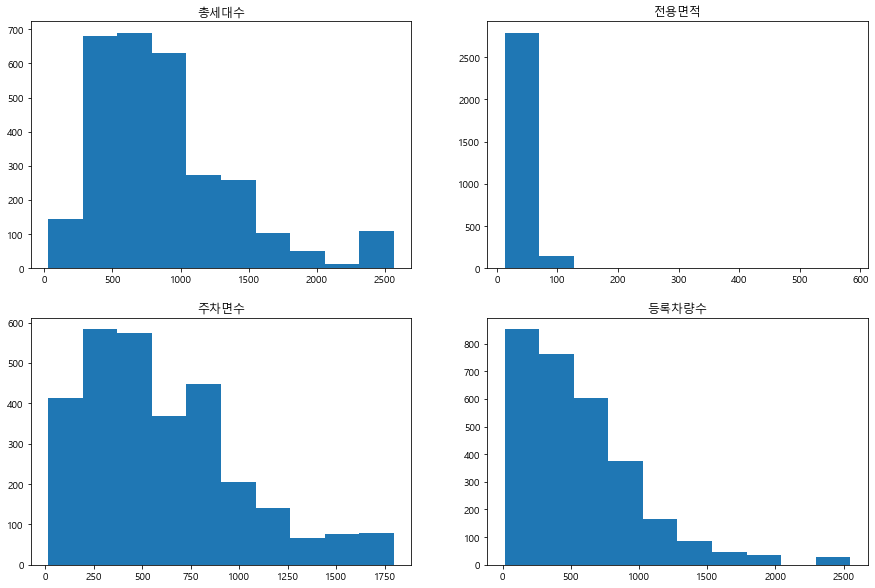

In [5]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(train['총세대수'])
ax2.hist(train['전용면적'])
ax3.hist(train['주차면수'])
ax4.hist(train['등록차량수'])

ax1.title.set_text('총세대수')
ax2.title.set_text('전용면적')
ax3.title.set_text('주차면수')
ax4.title.set_text('등록차량수')
plt.show()

In [6]:
train['전용면적'].sort_values()

101     12.62
786     14.10
391     14.10
219     14.10
767     14.10
        ...  
464    583.40
519    583.40
568    583.40
197    583.40
300    583.40
Name: 전용면적, Length: 2952, dtype: float64

## 1.3 칼럼별 상관계수 히트맵

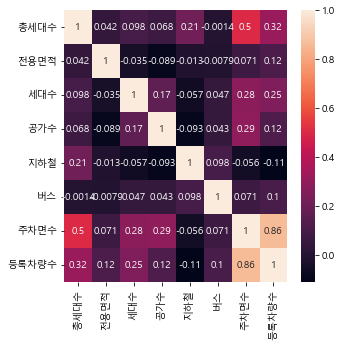

In [7]:
plt.figure(figsize = (5,5))
sns.heatmap(train.corr(), annot = True)
plt.show()

## 1.4 파생변수 생성

### 평균면적을 구하는 이유?
+ 총세대수, 전용면적을 이용하여 차원 수를 축소해보고자 함
+ 지금은 평균면적을 사용했으나 특정 면적 이상인 세대수만 추리는것도 하나의 방법이 될 수 있음.

In [8]:
train['면적세대']=train['전용면적']*train['세대수']/train['총세대수']

In [9]:
train

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수,면적세대
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,5.913867
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,0.662000
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,22.214500
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,0.865500
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,2.365700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,3.911297
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,7.266611
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,7.359079
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,24.784268


In [10]:
A=pd.DataFrame(train['면적세대'].groupby(train['단지코드']).sum())
A.head()

,면적세대
단지코드,
C1000,42.175230
C1004,39.490921
C1005,53.441049
C1013,45.952500
C1014,41.475843


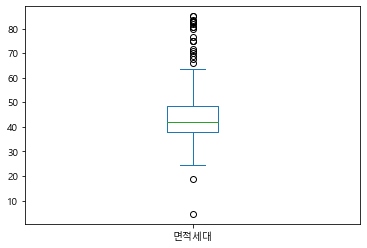

In [11]:
A.plot(kind='box')
plt.show()

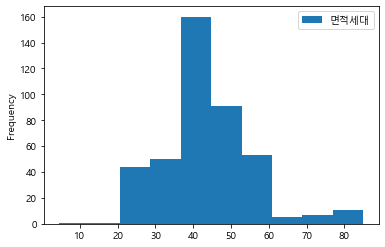

In [12]:
A.plot(kind='hist')
plt.show()

+ 우측꼬리를 가지지만 어느정도 정규분포.
+ 이상치들 특히 아래 두 포인트는 데이콘공지사항에 올라와있는 이상치에 속함
+ Q. 공지된 이상치를 제거해보면?

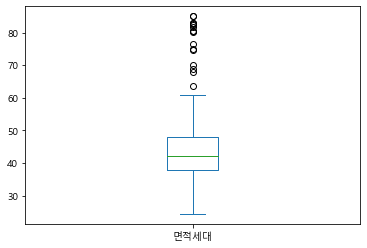

In [13]:
A.drop(['C1490','C2620','C1344','C1024','C2470','C1206','C1740','C2405',
      'C1804','C2085','C1397','C2431','C1649','C1036','C1095','C2051','C1218',
      'C1894','C2483','C1502','C1988']).plot(kind='box')
plt.show()

+ 현재는 이상치를 살리기엔 시간이 부족하므로 단순히 공지된 이상치만 삭제하여 분석하기로 결심

## 1.5 이상치 제거

In [14]:
train2=train.copy()
train2=train2.set_index('단지코드')
train2=train2.drop(['C1490','C2620','C1344','C1024','C2470','C1206','C1740','C2405',
                    'C1804','C2085','C1397','C2431','C1649','C1036','C1095','C2051',
                    'C1218','C1894','C2483','C1502','C1988'])
train2=train2.reset_index()
train2=train2[train2['지역']!='서울특별시']
train2

,단지코드,총세대수,건물구분,지역,공급유형,전용면적,세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,주차면수,등록차량수,면적세대
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,16.955009
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,4.359633
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,1.453211
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,3.270092
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,1.635046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,3.911297
2814,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,7.266611
2815,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,7.359079
2816,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,24.784268


In [15]:
train2.shape

(2784, 16)

In [16]:
train.shape

(2952, 16)

+ 168개 감소

## 1.6 단지코드로 그룹화
+ 데이터프레임을 단지코드별로 압축해 train3로 만들어 보자.
1. 총세대수는 그대로
2. 전용면적> 면적세대 병합
3. 세대수>면적세대 병합
4. 공가수 그대로
5. 지하철 그대로
6. 버스 그대로
7. 주차면수 그대로
8. 등록차량수 그대로
9. 면적세대는 합계. -> 단지별 평균면적이 구해짐

In [17]:
train3=pd.concat([pd.DataFrame(train2['총세대수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['공가수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['지하철'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['버스'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['주차면수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['등록차량수'].groupby(train2['단지코드']).mean()),
                  pd.DataFrame(train2['면적세대'].groupby(train2['단지코드']).sum())], ignore_index=True, axis=1)
train3.columns=(['총세대수', '공가수', '지하철', '버스', '주차면수', '등록차량수', '평균면적'])
train3.head()

,총세대수,공가수,지하철,버스,주차면수,등록차량수,평균면적
단지코드,,,,,,,
C1000,566.0,10.0,0.0,1.0,438.0,481.0,42.175230
C1004,521.0,3.0,NaN,2.0,153.0,93.0,39.490921
C1005,1144.0,16.0,NaN,8.0,950.0,376.0,53.441049
C1013,1308.0,16.0,0.0,6.0,1119.0,1665.0,45.952500
C1014,996.0,5.0,0.0,2.0,823.0,708.0,41.475843


+ 총세대수-공가수를 계산한 실세대수 칼럼을 추가하고 총세대수와 공가수 칼럼 제거.
+ na확인 및 제거 or 보완

In [18]:
train3['실세대수']=train3['총세대수']-train3['공가수']
train3.drop(['총세대수', '공가수'], axis=1, inplace=True)
train3.head()

,지하철,버스,주차면수,등록차량수,평균면적,실세대수
단지코드,,,,,,
C1000,0.0,1.0,438.0,481.0,42.175230,556.0
C1004,NaN,2.0,153.0,93.0,39.490921,518.0
C1005,NaN,8.0,950.0,376.0,53.441049,1128.0
C1013,0.0,6.0,1119.0,1665.0,45.952500,1292.0
C1014,0.0,2.0,823.0,708.0,41.475843,991.0


In [19]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, C1000 to C2692
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지하철     379 non-null    float64
 1   버스      398 non-null    float64
 2   주차면수    398 non-null    float64
 3   등록차량수   398 non-null    float64
 4   평균면적    398 non-null    float64
 5   실세대수    398 non-null    float64
dtypes: float64(6)
memory usage: 21.8+ KB


In [20]:
train3['지하철']=train3['지하철'].fillna(0)
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, C1000 to C2692
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지하철     398 non-null    float64
 1   버스      398 non-null    float64
 2   주차면수    398 non-null    float64
 3   등록차량수   398 non-null    float64
 4   평균면적    398 non-null    float64
 5   실세대수    398 non-null    float64
dtypes: float64(6)
memory usage: 21.8+ KB


+ 지하철 na -> 0으로 치환

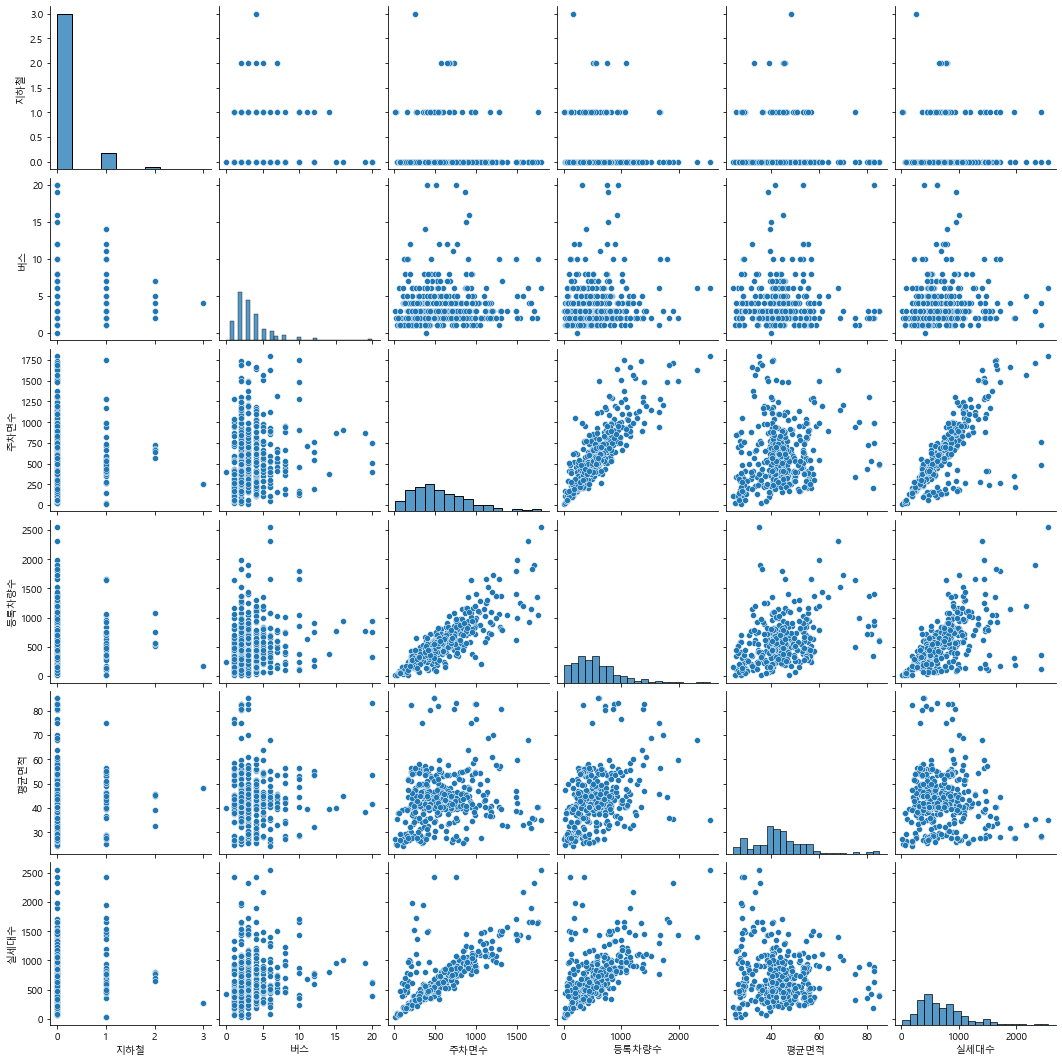

In [21]:
sns.pairplot(train3)
plt.show()

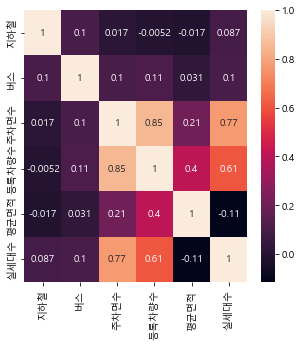

In [22]:
plt.figure(figsize = (5,5))
sns.heatmap(train3.corr(), annot = True)
plt.show()

# 2. 회귀분석

## 2.1 등록차량수 ~ 지하철 + 버스 + 주차면수 + 평균면적 + 실세대수

In [23]:
train3.columns

Index(['지하철', '버스', '주차면수', '등록차량수', '평균면적', '실세대수'], dtype='object')

In [24]:
x_train=train3.iloc[:,[0,1,2,4,5]].copy()
y_train=train3.iloc[:,3].copy()

In [25]:
from statsmodels.formula.api import ols
lm_1 = ols(f'등록차량수~{"+".join(list(x_train.columns))}', data=train3).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  등록차량수   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     272.6
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          3.54e-125
Time:                        20:07:05   Log-Likelihood:                -2634.3
No. Observations:                 398   AIC:                             5281.
Df Residuals:                     392   BIC:                             5304.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -322.9514     45.889     -7.038      0.000    -413.171    -232.732
지하철          -19.7415     24.081     -0.820      0.413     -67.086      27.603
버스             2.6835      3.242      0.828      0.408      -3.690       9.056
주차면수           0.8050      0.045     17.832      0.000       0.716       0.894
평균면적           8.6113      0.941      9.152      0.000       6.761      10.461
실세대수           0.0443      0.039      1.124      0.262      -0.033       0.122
==============================================================================
Omnibus:                       44.907   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.048
Skew:                           0.187   Prob(JB):                     2.06e-57
Kurtosis:                       6.950   Cond. No.                     5.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

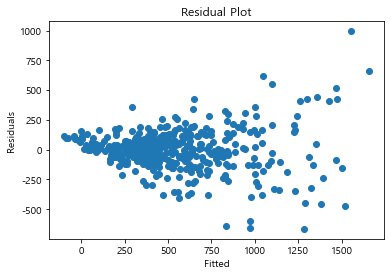

In [26]:
plt.scatter(lm_1.predict(), lm_1.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

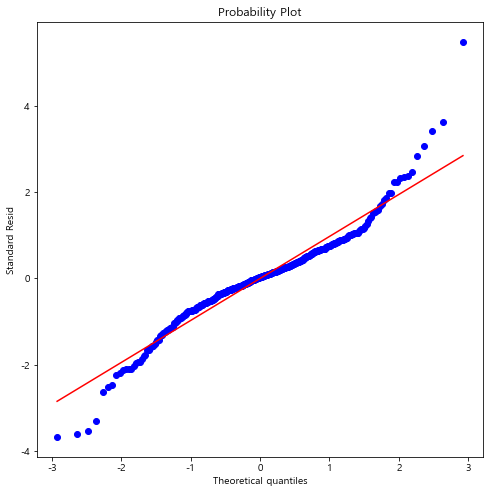

In [27]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
from scipy.stats import probplot 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
probplot(pd.DataFrame(stdsc.fit_transform(np.array(lm_1.resid).reshape(-1,1)))[0], dist='norm',plot=ax)
plt.ylabel('Standard Resid')
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error
print('MAE :', mean_absolute_error(y_train, lm_1.predict()))

MAE : 125.59996590412985


## 변수변환 회귀분석

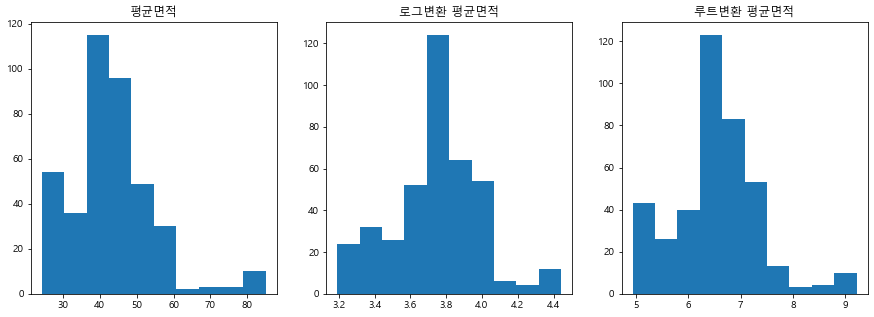

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['평균면적'])
ax2.hist(np.log(train3['평균면적']))
ax3.hist(np.sqrt(train3['평균면적']))
ax1.title.set_text('평균면적')
ax2.title.set_text('로그변환 평균면적')
ax3.title.set_text('루트변환 평균면적')
plt.show()

+ 평균면적 : 로그변환 채택

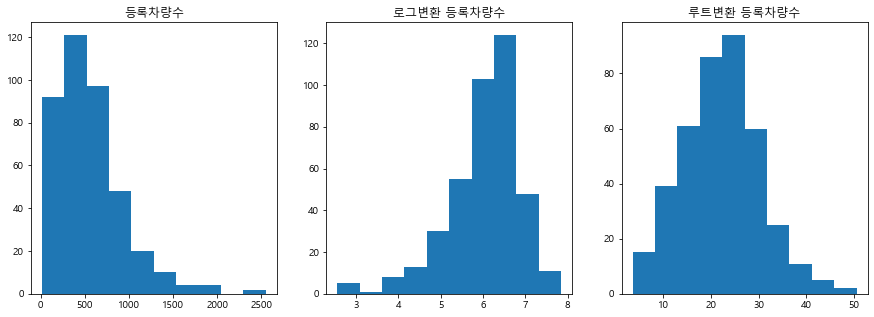

In [30]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['등록차량수'])
ax2.hist(np.log(train3['등록차량수']))
ax3.hist(np.sqrt(train3['등록차량수']))
ax1.title.set_text('등록차량수')
ax2.title.set_text('로그변환 등록차량수')
ax3.title.set_text('루트변환 등록차량수')
plt.show()

+ 등록차량수 : 루트변환 채택

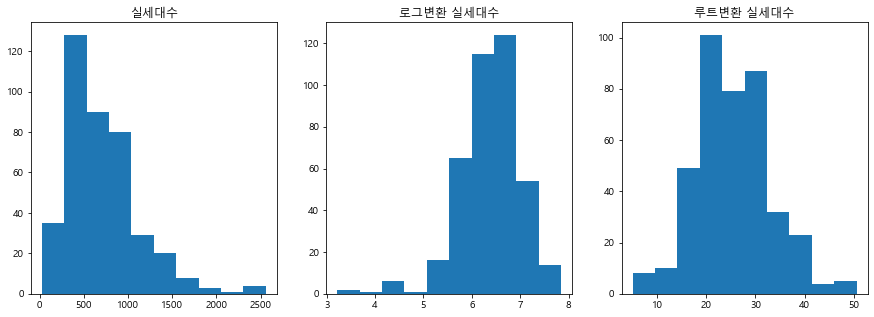

In [31]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['실세대수'])
ax2.hist(np.log(train3['실세대수']))
ax3.hist(np.sqrt(train3['실세대수']))
ax1.title.set_text('실세대수')
ax2.title.set_text('로그변환 실세대수')
ax3.title.set_text('루트변환 실세대수')
plt.show()

+ 실세대수 : 루트변환 채택

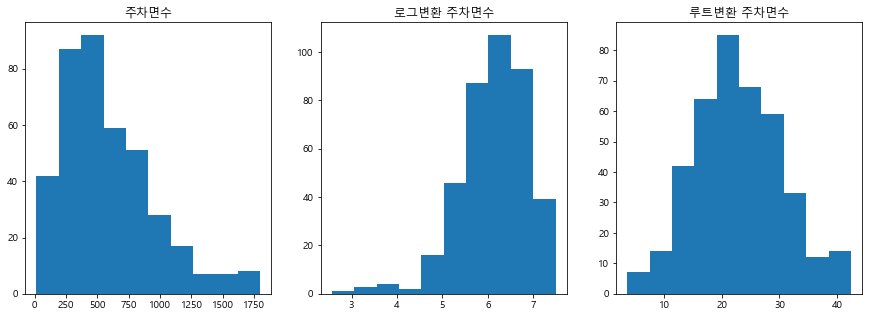

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.hist(train3['주차면수'])
ax2.hist(np.log(train3['주차면수']))
ax3.hist(np.sqrt(train3['주차면수']))
ax1.title.set_text('주차면수')
ax2.title.set_text('로그변환 주차면수')
ax3.title.set_text('루트변환 주차면수')
plt.show()

+ 주차면수 : 루트변환 채택

In [33]:
train4=train3
train4['평균면적']=np.log(train4['평균면적'])
train4['등록차량수']=np.sqrt(train4['등록차량수'])
train4['실세대수']=np.sqrt(train4['실세대수'])
train4['주차면수']=np.sqrt(train4['주차면수'])
train4.head()

,지하철,버스,주차면수,등록차량수,평균면적,실세대수
단지코드,,,,,,
C1000,0.0,1.0,20.928450,21.931712,3.741833,23.579652
C1004,0.0,2.0,12.369317,9.643651,3.676071,22.759613
C1005,0.0,8.0,30.822070,19.390719,3.978579,33.585711
C1013,0.0,6.0,33.451457,40.804412,3.827608,35.944402
C1014,0.0,2.0,28.687977,26.608269,3.725111,31.480152


## 2.2 sqrt(등록차량수)~지하철+버스+sqrt(주차면수)+log(평균면적)+sqrt(실세대수)

In [34]:
x_train2=train4.iloc[:,[0,1,2,4,5]].copy()
y_train2=train4.iloc[:,3].copy()

In [35]:
lm_2 = ols(f'등록차량수~{"+".join(list(x_train2.columns))}', data=train3).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  등록차량수   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     335.7
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          3.27e-139
Time:                        20:07:06   Log-Likelihood:                -1059.8
No. Observations:                 398   AIC:                             2132.
Df Residuals:                     392   BIC:                             2155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.3611      3.272     -8.057      0.000     -32.793     -19.929
지하철           -0.5523      0.460     -1.201      0.230      -1.456       0.352
버스             0.0412      0.062      0.663      0.507      -0.081       0.163
주차면수           0.8410      0.046     18.157      0.000       0.750       0.932
평균면적           7.7225      0.862      8.959      0.000       6.028       9.417
실세대수           0.0139      0.045      0.307      0.759      -0.075       0.103
==============================================================================
Omnibus:                       49.650   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.497
Skew:                          -0.688   Prob(JB):                     9.12e-23
Kurtosis:                       5.056   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

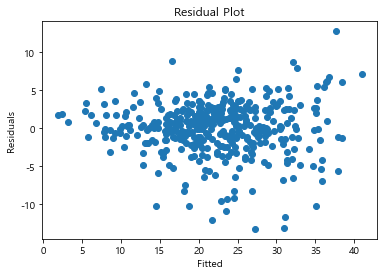

In [36]:
plt.scatter(lm_2.predict(), lm_2.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

+ 모델 피팅할 때 등록차량수에 루트를 취했으므로 제곱하여 MAE 계산

In [37]:
print('변수변환 전 MAE :', mean_absolute_error(y_train, lm_1.predict()))
print('변수변환 후 MAE :', mean_absolute_error(y_train, lm_2.predict()**2))

변수변환 전 MAE : 125.59996590412985
변수변환 후 MAE : 118.72636525933247


# 3. 생각해볼 문제들
1. 지역, 임대보증금등의 주어진 변수를 모두 활용을 못한 모형
2. 다중공선성문제를 처리 안함

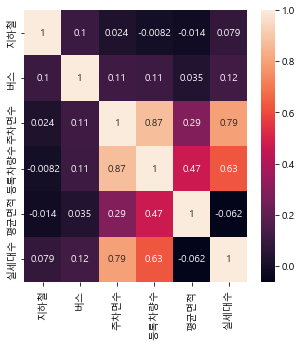

In [38]:
plt.figure(figsize = (5,5))
sns.heatmap(train4.corr(), annot = True)
plt.show()

+ 주차면수와 실세대수는 서로 상관관계가 매우 높음

In [39]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  등록차량수   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     335.7
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          3.27e-139
Time:                        20:07:07   Log-Likelihood:                -1059.8
No. Observations:                 398   AIC:                             2132.
Df Residuals:                     392   BIC:                             2155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.3611      3.272     -8.057      0.000     -32.793     -19.929
지하철           -0.5523      0.460     -1.201      0.230      -1.456       0.352
버스             0.0412      0.062      0.663      0.507      -0.081       0.163
주차면수           0.8410      0.046     18.157      0.000       0.750       0.932
평균면적           7.7225      0.862      8.959      0.000       6.028       9.417
실세대수           0.0139      0.045      0.307      0.759      -0.075       0.103
==============================================================================
Omnibus:                       49.650   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.497
Skew:                          -0.688   Prob(JB):                     9.12e-23
Kurtosis:                       5.056   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ 상식적으로 실세대수가 높아지면 등록차량수가 높아져야 하지만 분석결과는 그렇지 못함.
+ 계수를 살펴보면 실세대수는 주차수요의 p값이 0.735로 높아 분석에 크게 활용하지 못함을 알 수 있음.
+ 주차면수와 실세대수를 새로운 파생변수로 만들거나 하나를 임의로 제거하는 방법을 고려해 볼 수 있음.